In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
customers=pd.read_csv('Mall_Customers.csv')

In [4]:
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
customers.duplicated().sum()

0

In [7]:
customers.drop_duplicates(inplace=True)

In [8]:
customers.drop(columns=['CustomerID'],inplace=True)# Customer ID is not required for forming clusters

We should remove the outliers or Perform standardization of the columns value to compress the data within a certailn range. This will reduce the effect of outliers. 

To prevent biases from being introduced, One-Hot Encoding is preferable for nominal data (where there is no inherent order among categories). Label encoding, however, might be more appropriate for ordinal data (where categories naturally have an order). 

In [9]:
customers.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
customers.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [11]:
customers.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
x=customers.iloc[:,2:4] # Which cloumns to include for clusters depends on the user knowledge of the domain.
#Here we are using only two columns just to display graphs.

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [42]:
X=customers.iloc[:,2:4].values # for clustering
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# If we slectect only rows or only columns, work with loc. If want to focus on both rows and clumns, work with iloc

In [15]:
customers[2:10]#Rows 2 to 9

,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [16]:
customers['Genre']#column gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [17]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [18]:
customers[2:20] # select only rows or columns

,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72
10,Male,67,19,14
11,Female,35,19,99


In [19]:
customers['Genre']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [20]:
#rows and columns use iloc/loc. If loc we specify column name, with iloc we specify column number
customers.loc[2:7,'Genre']

2    Female
3    Female
4    Female
5    Female
6    Female
7    Female
Name: Genre, dtype: object

In [21]:
customers.iloc[2:7,0]# Before comma we speccify rows, after comma columns

2    Female
3    Female
4    Female
5    Female
6    Female
Name: Genre, dtype: object

In [22]:
X=customers.iloc[:,2:4].values # for clustering as clustering algorithm works better with 2D array

In [23]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#Choosing the number of Clusters. We do not require y values. No  train test split is required as there is no output to compare our result. But we do not know K value. Find k value to be fed to the algorith

In [24]:
#WCSS Within cluster sum of squared distances helps us to find the number of clusters


In [25]:
import warnings
warnings.filterwarnings('ignore')


In [26]:
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [27]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371]

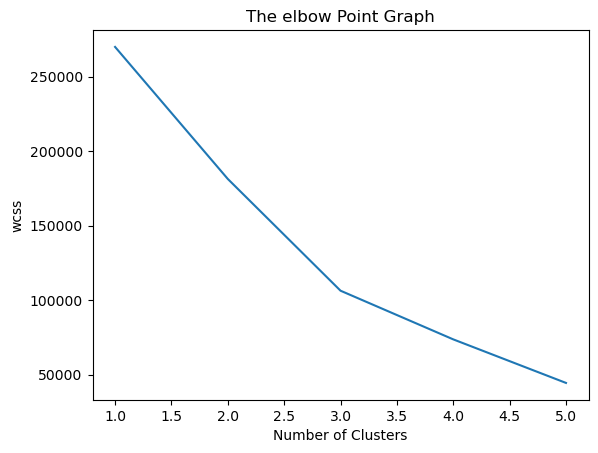

In [28]:
#Line plot
plt.plot(range(1,6),wcss) # Specify K first and then wcss value fitsr
plt.title('The elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show() # values decreasing very fast. Look for point where graph becomes horizontal 

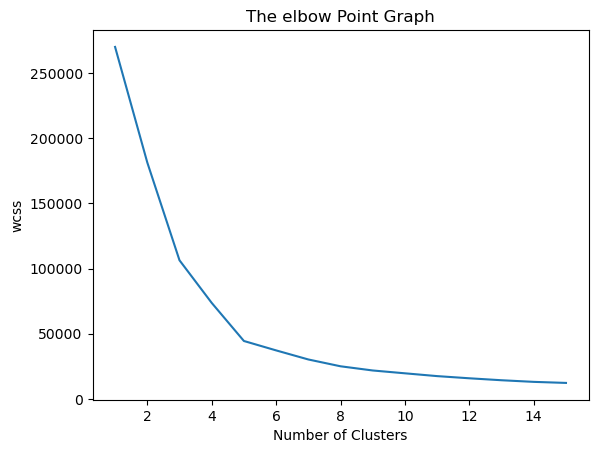

In [29]:
# Find optimal value of K - Kind of Hyper parameter tuning. Tro for other values of K
wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X) # Graph has become flat when i=10. Dont try large values unless required
    wcss.append(kmeans.inertia_) # inertia variable that holds the wcss value for a particular cluster
wcss
#Line plot
plt.plot(range(1,16),wcss) # Specify K first and then wcss value fitsr
plt.title('The elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()
# No bend after 5. The bend should be very clear. After 5 there is no bend. So K=5

In [30]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25043.970949607225,
 21826.936303231654,
 19657.783608703954,
 17508.97057740007,
 15838.717785514087,
 14339.526424097727,
 13093.787267853852,
 12286.448195749668]

In [31]:
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
Y=kmeans.predict(X) # Finding the output columns which is the cluster number for each point.


In [32]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [33]:
output=pd.DataFrame(Y,columns=['Cluster Number']) #  Convert array to a dataframe
#  Converted array to data frame

In [34]:
output

,Cluster Number
0,3
1,4
2,3
3,4
4,3
...,...
195,1
196,2
197,1
198,2


In [35]:
# Concatenation of columns
final_data=pd.concat([customers,output],axis=1)

In [36]:
final_data #  Now we can apply any algorithm for classification

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,2


In [37]:
grp_by_cluster=final_data.groupby('Cluster Number')

In [38]:
grp_by_cluster.groups

{0: [43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 126, 132, 142], 1: [123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199], 2: [124, 128, 130, 134, 136, 138, 140, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198], 3: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44], 4: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 45]}

In [39]:
grp_by_cluster.get_group(0)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
43,Female,31,39,61,0
46,Female,50,40,55,0
47,Female,27,40,47,0
48,Female,29,40,42,0
49,Female,31,40,42,0
...,...,...,...,...,...
121,Female,38,67,40,0
122,Female,40,69,58,0
126,Male,43,71,35,0
132,Female,25,72,34,0


In [40]:
less_income_less_spending=grp_by_cluster.get_group(4)
less_income_less_spending

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
1,Male,21,15,81,4
3,Female,23,16,77,4
5,Female,22,17,76,4
7,Female,23,18,94,4
9,Female,30,19,72,4
11,Female,35,19,99,4
13,Female,24,20,77,4
15,Male,22,20,79,4
17,Male,20,21,66,4
19,Female,35,23,98,4


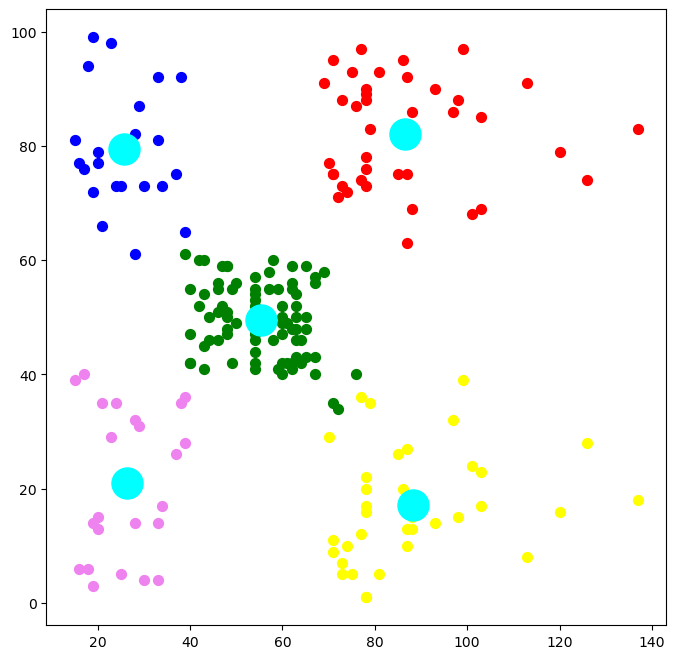

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='cluster1')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='cluster1')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='cluster1')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='cluster1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=500, c='cyan', label='centroid')